<a href="https://colab.research.google.com/github/lenmoru666/MachineLearning_Ganjil_2023/blob/main/Job_Sheet_11_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Falendika Tegar Pratama
### Kelas : 3G-TI
### Nim : 2141720107

#### Link Github : (https://github.com/lenmoru666/MachineLearning_Ganjil_2023/blob/main/Job_Sheet_11_Convolutional_Neural_Network_(CNN).ipynb)

# Praktikum 1 - Klasifikasi 🐱 dan 🐶


## Deskripsi

Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

## Dataset

Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing. Dikarenakan data cukup besar, pastikan koneksi Anda sebelum mengunduh dataset.

## Persiapan data

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Langkah 1 - Import Library

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Langkah 2 - Pra Pengolahan Data

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

### Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML/Jobsheet 11/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML/Jobsheet 11/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN

### Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

## Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 4042s 16s/step - loss: 0.6402 - accuracy: 0.6329 - val_loss: 0.6032 - val_accuracy: 0.6755
Epoch 2/25
250/250 [==============================] - 37s 150ms/step - loss: 0.5832 - accuracy: 0.6905 - val_loss: 0.5596 - val_accuracy: 0.7235
Epoch 3/25
250/250 [==============================] - 37s 148ms/step - loss: 0.5467 - accuracy: 0.7179 - val_loss: 0.6035 - val_accuracy: 0.6935
Epoch 4/25
250/250 [==============================] - 37s 149ms/step - loss: 0.5286 - accuracy: 0.7343 - val_loss: 0.4997 - val_accuracy: 0.7595
Epoch 5/25
250/250 [==============================] - 37s 149ms/step - loss: 0.4981 - accuracy: 0.7616 - val_loss: 0.4851 - val_accuracy: 0.7670
Epoch 6/25
250/250 [==============================] - 37s 149ms/step - loss: 0.4840 - accuracy: 0.7642 - val_loss: 0.5007 - val_accuracy: 0.7660
Epoch 7/25
250/250 [==============================] - 38s 151ms/step - loss: 0.4679 - accuracy: 0.7735 - val_loss: 0.4914 - val_ac

## Langkah 5 - Prediksi dengan 1 Citra

Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ML/Jobsheet 11/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 144ms/step


<br>

# Praktikum 2 - Klasifikasi Multi-label dengan Data CIFAT

Desclaimer: Praktikum ini merupakan tutorial CNN dari Tensorflow yang dapat diakses pada laman https://www.tensorflow.org/tutorials/images/cnn

## Deskripsi

Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

## Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 13s 0us/step


## Langkah 3 - Verifikasi Data

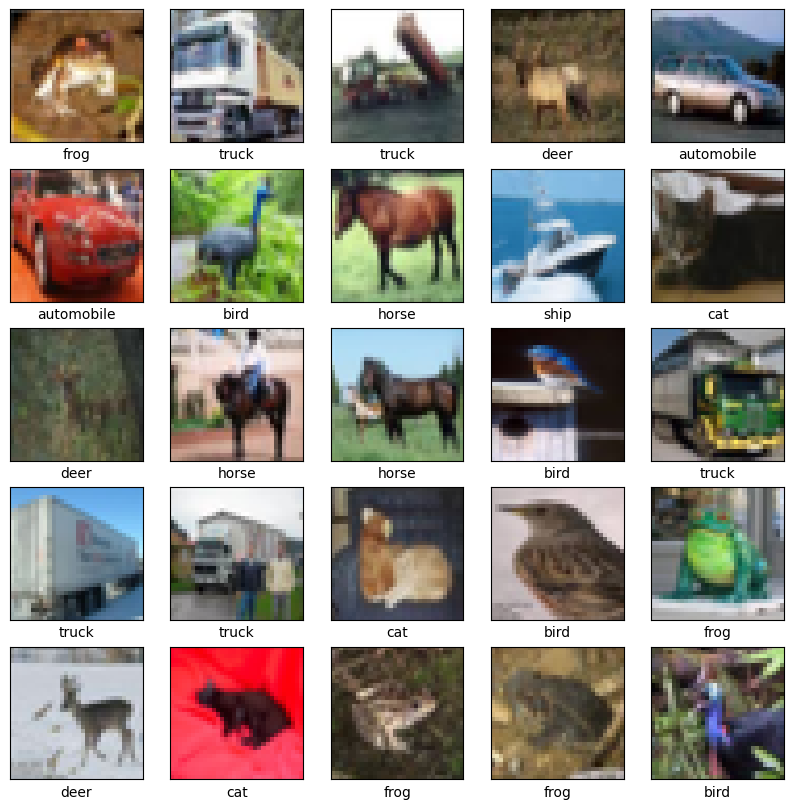

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Langkah 4 - Buat Model CNN

### Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

### Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

### Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4935 - accuracy: 0.4557 - val_loss: 1.4344 - val_accuracy: 0.5074
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1136 - accuracy: 0.6051 - val_loss: 1.1082 - val_accuracy: 0.6176
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9687 - accuracy: 0.6605 - val_loss: 0.9333 - val_accuracy: 0.6691
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8612 - accuracy: 0.6969 - val_loss: 0.9435 - val_accuracy: 0.6719
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7904 - accuracy: 0.7220 - val_loss: 0.8937 - val_accuracy: 0.6938
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7311 - accuracy: 0.7470 - val_loss: 0.8612 - val_accuracy: 0.7062
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6743 - accuracy: 0.7660 - val_loss: 0.8628 - val_accuracy

## Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.8671 - accuracy: 0.7193 - 681ms/epoch - 2ms/step


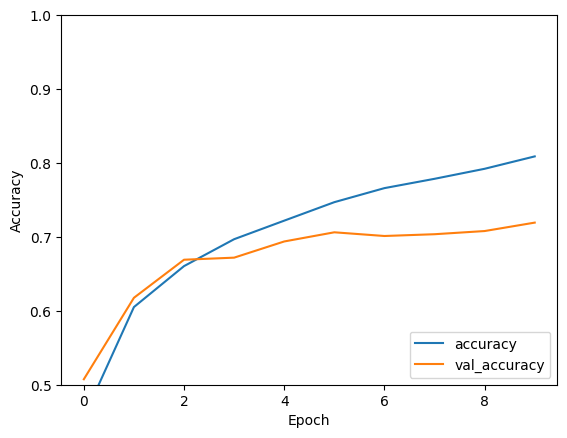

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)
print(f'Akurasi: {test_acc * 100:.2f}%')

0.7192999720573425
Akurasi: 71.93%


Berapa akurasi yang Anda dapatkan?

Akurasi yang saya dapatkan sebesar 71.93%

<br>

# Tugas

- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
- Buatlah model CNN untuk klasifikasi dataset MNIST.

# Jawaban

## 1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

### Impor pustaka dan modul yang diperlukan

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

### Memuat dataset CIFAR-10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

170498071/170498071 [==============================] - 13s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


### Normalisasi data dan konversi label ke vektor one-hot encoded

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Memisahkan data latih menjadi data latih dan data validasi

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Mendefinisikan model Convolutional Neural Network (CNN)

In [ ]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

### Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

### Membuat model dan mengompilasi

In [ ]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

### Melatih model dengan ImageDataGenerator

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=125,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/125
625/625 [==============================] - 50s 58ms/step - loss: 2.1517 - accuracy: 0.1751 - val_loss: 1.8478 - val_accuracy: 0.2668
Epoch 2/125
625/625 [==============================] - 33s 53ms/step - loss: 1.8224 - accuracy: 0.3018 - val_loss: 1.5583 - val_accuracy: 0.4313
Epoch 3/125
625/625 [==============================] - 34s 54ms/step - loss: 1.5947 - accuracy: 0.4126 - val_loss: 1.4259 - val_accuracy: 0.4687
Epoch 4/125
625/625 [==============================] - 36s 57ms/step - loss: 1.4477 - accuracy: 0.4831 - val_loss: 1.2520 - val_accuracy: 0.5471
Epoch 5/125
625/625 [==============================] - 42s 67ms/step - loss: 1.3394 - accuracy: 0.5365 - val_loss: 1.0878 - val_accuracy: 0.6094
Epoch 6/125
625/625 [==============================] - 34s 54ms/step - loss: 1.2459 - accuracy: 0.5787 - val_loss: 1.0692 - val_accuracy: 0.6335
Epoch 7/125
625/625 [==============================] - 35s 57ms/step - loss: 1.1924 - accuracy: 0.6028 - val_loss: 0.9791 - val_ac

### Mengevaluasi model pada set tes

In [ ]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7068 - accuracy: 0.8484


### Melakukan prediksi

<Axes: >

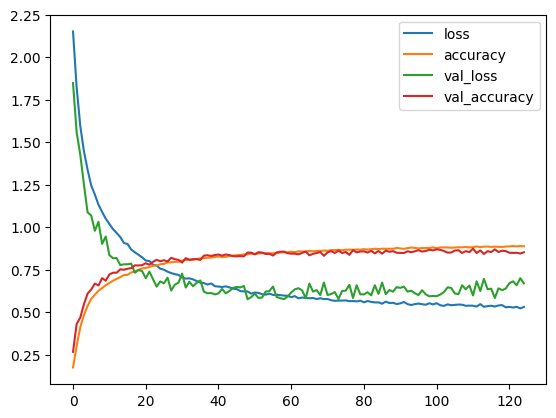

In [ ]:
pd.DataFrame(history.history).plot()

### Tampilkan laporan klasifikasi

In [ ]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1000
           1       0.93      0.95      0.94      1000
           2       0.90      0.72      0.80      1000
           3       0.79      0.63      0.70      1000
           4       0.83      0.82      0.82      1000
           5       0.81      0.78      0.79      1000
           6       0.72      0.97      0.82      1000
           7       0.88      0.90      0.89      1000
           8       0.93      0.93      0.93      1000
           9       0.86      0.94      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### Menampilkan visualisasi hasil prediksi

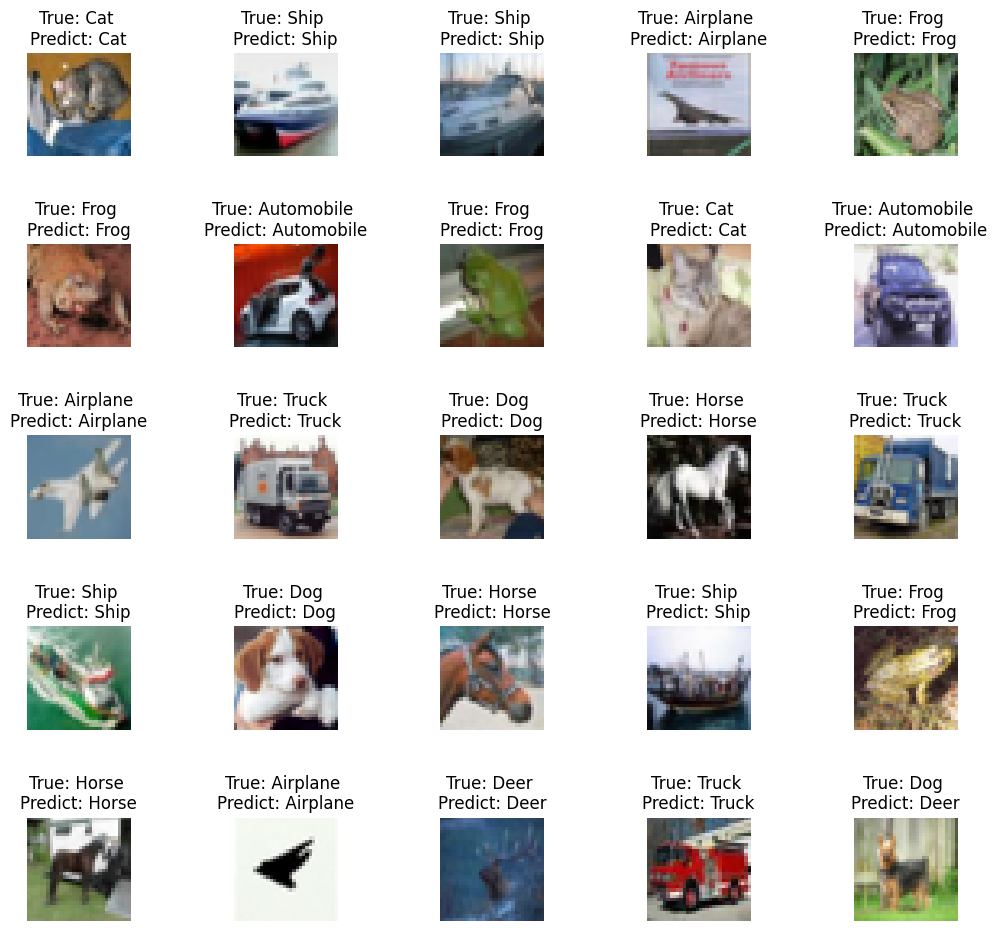

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## 2. Buatlah model CNN untuk klasifikasi dataset MNIST.

### Memuat Dataset MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### Normalisasi Gambar ke Rentang [0, 1]

In [ ]:
# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

### Mengonversi Label ke Format One-Hot Encoding

In [ ]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

### Menampilkan Informasi tentang Dataset

In [ ]:
# Menampilkan informasi tentang dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


### Membangun Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

### Mengompilasi Model

In [ ]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Menampilkan Ringkasan Model

In [ ]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

### Melatih Model

In [ ]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)

Epoch 1/10
329/329 - 5s - loss: 0.3834 - accuracy: 0.8816 - val_loss: 0.0980 - val_accuracy: 0.9712 - 5s/epoch - 15ms/step
Epoch 2/10
329/329 - 2s - loss: 0.1101 - accuracy: 0.9680 - val_loss: 0.0632 - val_accuracy: 0.9806 - 2s/epoch - 5ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0742 - accuracy: 0.9779 - val_loss: 0.0525 - val_accuracy: 0.9839 - 2s/epoch - 6ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0614 - accuracy: 0.9820 - val_loss: 0.0499 - val_accuracy: 0.9852 - 2s/epoch - 6ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0424 - val_accuracy: 0.9877 - 2s/epoch - 5ms/step
Epoch 6/10
329/329 - 2s - loss: 0.0404 - accuracy: 0.9884 - val_loss: 0.0416 - val_accuracy: 0.9878 - 2s/epoch - 6ms/step
Epoch 7/10
329/329 - 2s - loss: 0.0331 - accuracy: 0.9900 - val_loss: 0.0499 - val_accuracy: 0.9859 - 2s/epoch - 6ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.0409 - val_accuracy: 0.9888 - 2s/epoch - 5ms/step
Epoch 9/10
329/329 - 2s

### Plot Sejarah Pelatihan

Text(0.5, 1.0, 'Loss Pelatihan dan Validasi')

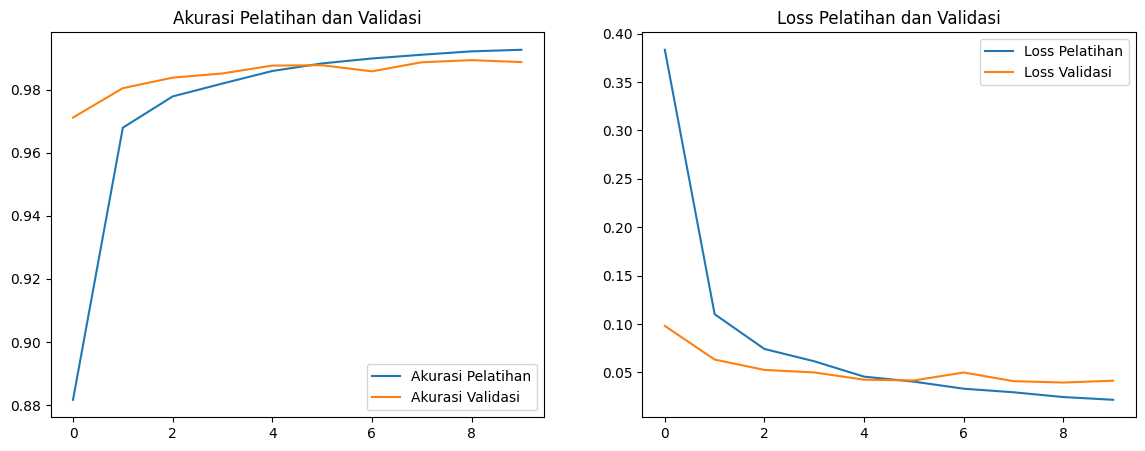

In [ ]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

### Evaluasi Model pada Kumpulan Data Uji

In [ ]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.031066186726093292
Akurasi Validasi: 0.9912999868392944


### Menghasilkan Nilai Prediksi pada Kumpulan Data Uji

In [ ]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


### Mendekode Nilai Prediksi

In [ ]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

### Menampilkan Laporan Klasifikasi

In [ ]:
# Menampilkan laporan klasifikasi
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Membuat Matriks Konfusi dan Menampilkannya dengan Heatmap

Text(58.222222222222214, 0.5, 'Aktual')

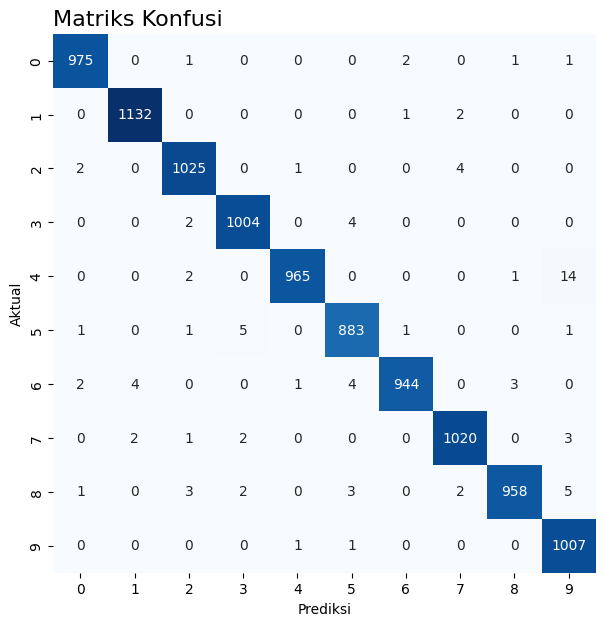

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

### Menampilkan Target yang Diprediksi pada Setiap Gambar (Label di atas gambar adalah label yang diprediksi)

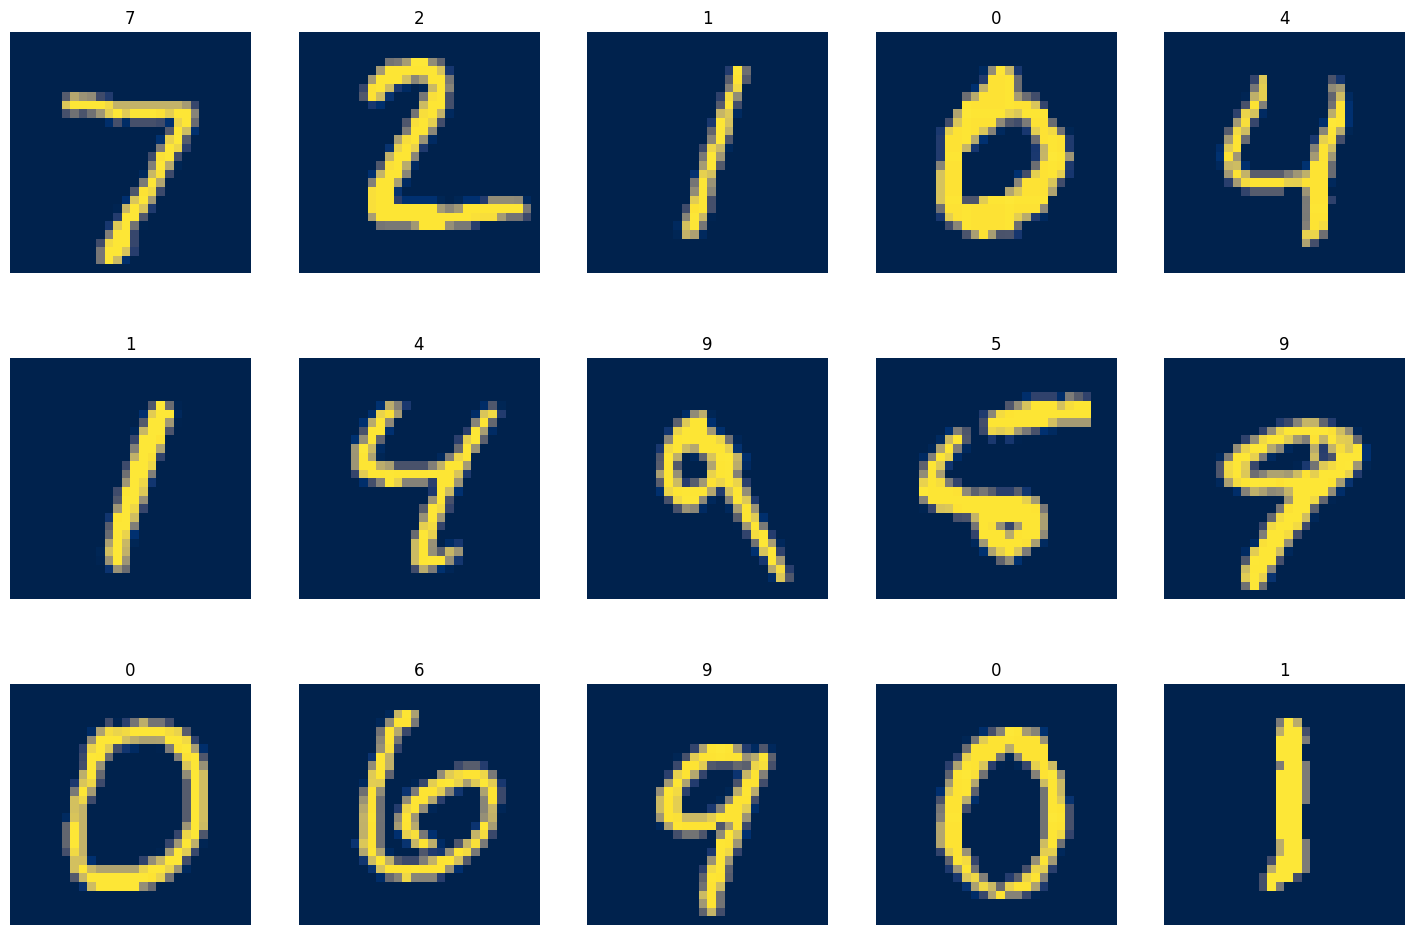

In [ ]:
# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(18, 12))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')